In [46]:
import pandas as pd

# for oversampling & undersampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# import helper functions
%run -i helper_functions.py

import warnings
warnings.filterwarnings("ignore")

In [32]:
#Load data
selected_train = pd.read_csv('Data/selected_train.csv')
cleaned_train = pd.read_csv('Data/cleaned_train.csv')

In [21]:
print(selected_train.shape)
print(cleaned_train.shape)

(159571, 48)
(159571, 10)


In [22]:
#Concatenate clean_text column to selected_train dataset
selected_train = pd.concat([selected_train, cleaned_train['clean_text']], axis = 1)

In [49]:
def Oversample(df, cat):
    X_train = df.drop(cat, axis = 1)
    y_train = df[cat]

    ros = RandomOverSampler(random_state=0, sampling_strategy=0.5)
    X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

    # Check the number of records after over sampling
    print(X_train_ros.shape)
    print(sorted(Counter(y_train_ros).items()))

    #Concatenate X_train and y_train
    train_oversampled = pd.concat([X_train_ros,  y_train_ros], axis=1)
    return train_oversampled

In [53]:
cats = ['threat', 'identity_hate', 'severe_toxic', 'toxic']

train_oversampled = Oversample(selected_train, cats[0])
train_oversampled = Oversample(train_oversampled, cats[1])
train_oversampled = Oversample(train_oversampled, cats[2])

(238639, 48)
[(0, 159093), (1, 79546)]
(331663, 48)
[(0, 221109), (1, 110554)]
(421989, 48)
[(0, 281326), (1, 140663)]


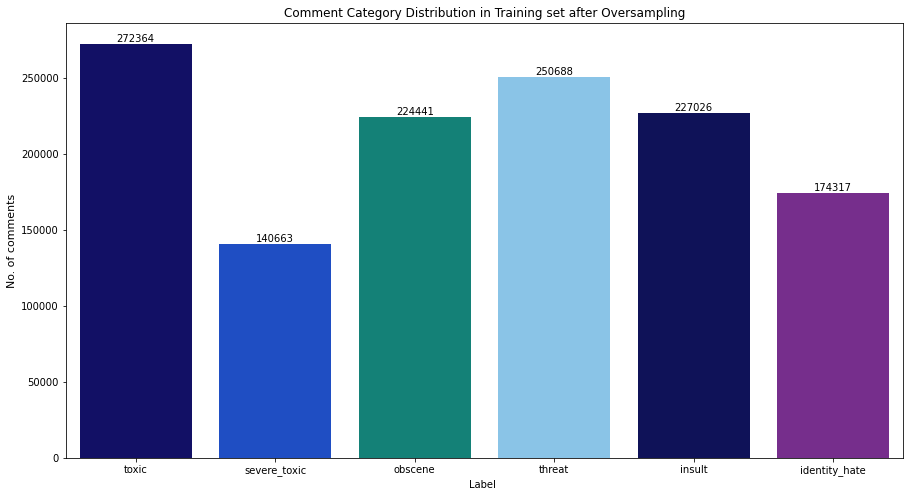

In [54]:
colors_ = ["deep blue","blue", "teal", "lightblue", "darkblue", "purple"]

palette= sns.xkcd_palette(colors_)

x = train_oversampled[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

plt.figure(figsize=(15,8))

ax= sns.barplot(x=x.index,y=x.values,palette=palette)
plt.title("Comment Category Distribution in Training set after Oversampling")
plt.xlabel('Label ')
plt.ylabel('No. of comments', fontsize=11)

patch = ax.patches
labels = x.values
for rect, label in zip(patch, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, va='bottom',ha='center')

plt.show()

In [55]:
train_oversampled.to_csv('Data/train_oversampled.csv', index=False)

In [33]:
oversampled_train = pd.read_csv('Data/train_oversampled.csv')

In [34]:
oversampled_train = oversampled_train[selected_train.columns]

In [35]:
print(oversampled_train.shape)
oversampled_train.head()

(421989, 48)


,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,min_length_scaled,num_words_vs_length,exclamation_marks_vs_length,...,105,114,132,135,139,143,156,157,170,198
0,0,0,0,0,0,0,1,0.009393,0.181132,0.000000,...,-0.091320,-0.017755,0.003997,-0.199211,-0.109984,0.089084,0.012651,-0.019501,-0.091946,-0.113697
1,0,0,0,0,0,0,1,0.000723,0.160714,0.008929,...,-0.118445,0.039541,0.017522,0.001397,0.000094,0.021135,0.039308,-0.067295,-0.079366,-0.044959
2,0,0,0,0,0,0,1,0.007225,0.188841,0.000000,...,-0.131555,-0.060714,0.026459,-0.029582,-0.146134,0.109907,0.036539,-0.053628,0.027530,-0.211230
3,0,0,0,0,0,0,1,0.007948,0.175719,0.000000,...,-0.145382,-0.004285,-0.000706,-0.134984,-0.214832,0.177560,0.007675,-0.087473,0.106848,-0.015987
4,0,0,0,0,0,0,1,0.003613,0.208955,0.000000,...,0.007073,-0.204627,0.162032,0.013798,-0.221076,0.163578,-0.068310,-0.031184,-0.017280,0.038566


In [36]:
from skmultilearn.problem_transform import BinaryRelevance

## Logistic Regression  using Oversampled Data

In [37]:
# for logistic regression
from sklearn.linear_model import LogisticRegression

In [91]:
classifier_lr = BinaryRelevance(LogisticRegression(max_iter=10000, class_weight='balanced'))
scores_lr = model_evaluation(classifier_lr, selected_train)

Starting fitting...
Evaluation Scores:
[0.7811687294375685, 0.3831130728226899, 0.8747718657868876, 0.521828493817615, 0.3618255032659731, 0.9571794323469397]

Starting fitting...
Evaluation Scores:
[0.7805351883186062, 0.37672872547934455, 0.8648764462219682, 0.5136755166226163, 0.35571462593376446, 0.9534684576961253]

Starting fitting...
Evaluation Scores:
[0.7807858620041361, 0.3837217238770336, 0.8641676168757126, 0.521262045927501, 0.35584073705340186, 0.9546083237841234]

Starting fitting...
Evaluation Scores:
[0.7794071567337219, 0.3735734634690983, 0.8741740879057742, 0.5129693113874385, 0.353272045299666, 0.9553084514822838]

Starting fitting...
Evaluation Scores:
[0.7829792567525224, 0.3746243729241855, 0.8624928530588908, 0.5114376991619516, 0.35573818962601017, 0.9522242635333383]



In [39]:
scores_lr

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.781169,0.383113,0.874772,0.521828,0.361826,0.957179
1,0.780535,0.376729,0.864876,0.513676,0.355715,0.953468
2,0.780786,0.383722,0.864168,0.521262,0.355841,0.954608
3,0.779407,0.373573,0.874174,0.512969,0.353272,0.955308
4,0.782979,0.374624,0.862493,0.511438,0.355738,0.952224


##  Random Forest  using Oversampled Data

In [40]:
# for random forest
from sklearn.ensemble import RandomForestClassifier

In [49]:
classifier_rf = BinaryRelevance(RandomForestClassifier(random_state = 0, class_weight='balanced', max_depth = 10))
scores_rf = model_evaluation(classifier_rf, oversampled_train)

Starting fitting...
Evaluation Scores:
[0.9142396739259224, 0.8087635674269409, 0.6373919539003308, 0.6947852181659963, 0.32283571165543096, 0.9615012470167276]

Starting fitting...
Evaluation Scores:
[0.9229602597217944, 0.9234238217505132, 0.8824468297354455, 0.899309412779212, 0.8437126571227573, 0.986808579853674]

Starting fitting...
Evaluation Scores:
[0.7891537714163843, 0.9711439663901921, 0.9454580899061219, 0.9565519837882255, 5.873123044311706, 0.9849388035571124]

Starting fitting...
Evaluation Scores:
[0.9096542572098865, 0.9870482461472505, 0.9901319330366127, 0.9882527031430292, 8.445809038702345, 0.9955451913695413]

Starting fitting...
Evaluation Scores:
[0.9466924179769423, 0.9901614573241798, 0.9974580590495894, 0.9937324571668843, 9.567934081420992, 0]



In [50]:
scores_rf

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.914240,0.808764,0.637392,0.694785,0.322836,0.961501
1,0.922960,0.923424,0.882447,0.899309,0.843713,0.986809
2,0.789154,0.971144,0.945458,0.956552,5.873123,0.984939
3,0.909654,0.987048,0.990132,0.988253,8.445809,0.995545
4,0.946692,0.990161,0.997458,0.993732,9.567934,0.000000


## Baseline LGBM using Oversampled Data

In [51]:
# for lightGBM
from lightgbm import LGBMClassifier

In [52]:
classifier_lgbm = BinaryRelevance(LGBMClassifier(random_state=0))
scores_lgbm = model_evaluation(classifier_lgbm, oversampled_train)

Starting fitting...
Evaluation Scores:
[0.9052821156899452, 0.7275338053657607, 0.7221214384804183, 0.7153400601285698, 0.2984882669882681, 0.9707371617914005]

Starting fitting...
Evaluation Scores:
[0.9167989762790587, 0.894502643741793, 0.9079645664578428, 0.9000031650939231, 0.8112065649033643, 0.9903065435104373]

Starting fitting...
Evaluation Scores:
[0.9774402237019835, 0.9991495237215695, 0.9934876240488825, 0.9962991110025188, 5.69130664267119, 0.999727643128436]

Starting fitting...
Evaluation Scores:
[0.9530913054811725, 0.9969948741425017, 0.9876467807683847, 0.9922384948049341, 8.374636296065017, 0.9983726108703258]

Starting fitting...
Evaluation Scores:
[0.9730796118345438, 0.9976785217762376, 0.9949462256908079, 0.9962967792869002, 9.50704649429123, 0]



In [53]:
scores_lgbm

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.905282,0.727534,0.722121,0.715340,0.298488,0.970737
1,0.916799,0.894503,0.907965,0.900003,0.811207,0.990307
2,0.977440,0.999150,0.993488,0.996299,5.691307,0.999728
3,0.953091,0.996995,0.987647,0.992238,8.374636,0.998373
4,0.973080,0.997679,0.994946,0.996297,9.507046,0.000000


## Baseline Naive Bayes using Oversampled Data

In [42]:
# for naive bayes
from sklearn.naive_bayes import GaussianNB

In [47]:
classifier_nb = BinaryRelevance(GaussianNB())
scores_nb = model_evaluation(classifier_nb, oversampled_train)

Starting fitting...
Evaluation Scores:
[0.8862176828834807, 0.6783396482619989, 0.5650944402945257, 0.6010863251058003, 1.1792628742829085, 0.9321363773212885]

Starting fitting...
Evaluation Scores:
[0.8058129339557809, 0.7281573251001024, 0.6623438809305295, 0.6859847992514662, 2.2664678827621176, 0.9472236938375205]

Starting fitting...
Evaluation Scores:
[0.11489608758501386, 0.8335540338988808, 0.7168700388062066, 0.7565272486919825, 13.026932329398505, 0.70741291399243]

Starting fitting...
Evaluation Scores:
[0.26338301855494206, 0.9339242823941687, 0.7208018009163707, 0.8040693718248031, 16.986055462726895, 0.661720451277185]

Starting fitting...
Evaluation Scores:
[0.4906335533253552, 0.9443222168092152, 0.8955718184340181, 0.9137528842938825, 13.549578622568056, 0]



In [48]:
scores_nb

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.886218,0.678340,0.565094,0.601086,1.179263,0.932136
1,0.805813,0.728157,0.662344,0.685985,2.266468,0.947224
2,0.114896,0.833554,0.716870,0.756527,13.026932,0.707413
3,0.263383,0.933924,0.720802,0.804069,16.986055,0.661720
4,0.490634,0.944322,0.895572,0.913753,13.549579,0.000000


## Baseline Adaboost using Oversampled Data

In [54]:
# for adaboost
from sklearn.ensemble import AdaBoostClassifier

In [55]:
classifier_ab = BinaryRelevance(AdaBoostClassifier(random_state=0))
scores_ab = model_evaluation(classifier_ab, oversampled_train)

Starting fitting...
Evaluation Scores:
[0.8283134671437712, 0.5619624959473138, 0.7050474869277559, 0.6150736465227052, 0.39353072376918324, 0.9420300359412351]

Starting fitting...
Evaluation Scores:
[0.8080049290267541, 0.7225395246961945, 0.8606799409440964, 0.7799054840153125, 1.0523644369689829, 0.9735808559074013]

Starting fitting...
Evaluation Scores:
[0.4642527074101282, 0.8964235104986165, 0.9011111855692084, 0.8900851995723706, 6.921630788909405, 0.9170933400927229]

Starting fitting...
Evaluation Scores:
[0.581731794592289, 0.9714175359210422, 0.9232621484632774, 0.940549844041156, 9.040094648996574, 0.9550150082883783]

Starting fitting...
Evaluation Scores:
[0.7793404978849959, 0.9779106441073144, 0.9671719724128439, 0.9713933695854775, 9.854789418772992, 0]



In [56]:
scores_ab

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.828313,0.561962,0.705047,0.615074,0.393531,0.942030
1,0.808005,0.722540,0.860680,0.779905,1.052364,0.973581
2,0.464253,0.896424,0.901111,0.890085,6.921631,0.917093
3,0.581732,0.971418,0.923262,0.940550,9.040095,0.955015
4,0.779340,0.977911,0.967172,0.971393,9.854789,0.000000


## Baseline XGboost using Oversampled Data

In [24]:
# for xgboost
from xgboost import XGBClassifier

In [57]:
classifier_xgb = BinaryRelevance(XGBClassifier(random_state=0))
scores_xgb = model_evaluation(classifier_xgb, oversampled_train)

Starting fitting...
Evaluation Scores:
[0.9175454394653901, 0.7600911412988168, 0.7344466972574966, 0.7417628261264357, 0.2813209333668061, 0.9695195204022962]

Starting fitting...
Evaluation Scores:
[0.927533827815825, 0.9200546962919735, 0.9148078688001277, 0.916795897318765, 0.7937134043511747, 0.9903273290984365]

Starting fitting...
Evaluation Scores:
[0.9993601744117159, 0.9999908605870615, 0.9997471809149004, 0.9998689756017632, 5.584707234336007, 0.9999960281872008]

Starting fitting...
Evaluation Scores:
[0.9841109978909452, 0.9995707292524044, 0.9956989549256092, 0.9976262854644229, 8.32135630488942, 0.9996966493421997]

Starting fitting...
Evaluation Scores:
[0.9936609121177293, 0.9995228833623879, 0.9990150516452724, 0.9992683181354984, 9.472222242182436, 0]



In [58]:
scores_xgb

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.917545,0.760091,0.734447,0.741763,0.281321,0.969520
1,0.927534,0.920055,0.914808,0.916796,0.793713,0.990327
2,0.999360,0.999991,0.999747,0.999869,5.584707,0.999996
3,0.984111,0.999571,0.995699,0.997626,8.321356,0.999697
4,0.993661,0.999523,0.999015,0.999268,9.472222,0.000000


In [86]:
scores_collection = pd.DataFrame({'model name': [], 'accuracy':[], 'precision_weighted':[], 'recall_weighted':[], 
                                      'f1_weighted':[], 'log_loss':[], 'roc_auc_weighted':[]})
scores_collection.loc[len(scores_collection)] = ['Logistic Regression']+np.mean(scores_lr).values.tolist()
scores_collection.loc[len(scores_collection)] = ['Naive Bayes']+np.mean(scores_nb).values.tolist()
scores_collection.loc[len(scores_collection)] = ['Random Forest']+np.mean(scores_rf).values.tolist()
scores_collection.loc[len(scores_collection)] = ['LightGBM']+np.mean(scores_lgbm).values.tolist()
scores_collection.loc[len(scores_collection)] = ['Adaboost']+np.mean(scores_ab).values.tolist()
scores_collection.loc[len(scores_collection)] = ['XGboost']+np.mean(scores_xgb).values.tolist()

In [87]:
for i in range(1, len(scores_collection)):
    scores_collection.loc[i, 'roc_auc_weighted'] = scores_collection.loc[i, 'roc_auc_weighted']*5/4

In [88]:
scores_collection

,model name,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,Logistic Regression,0.780975,0.378352,0.868097,0.516235,0.356478,0.954558
1,Naive Bayes,0.512189,0.823660,0.712136,0.752284,9.401659,0.812123
2,Random Forest,0.896540,0.936108,0.890577,0.906526,5.010683,0.982198
3,LightGBM,0.945138,0.923172,0.921233,0.920036,4.936537,0.989786
4,Adaboost,0.692329,0.826051,0.871455,0.839402,5.452482,0.946930
5,XGboost,0.964442,0.935846,0.928743,0.931064,4.890664,0.989885


In [92]:
scores_collection.to_csv('performance\Oversampled Evaluation.csv', index=False)